<a href="https://colab.research.google.com/github/202422/Cryptocurrency-Closing-Price-Prediction/blob/main/Notebooks/Raw_data_exploration_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Data Import**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Train.csv")

In [6]:
pd.set_option("display.max_columns", None)

# **Data exploration**

In [7]:
df.columns

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

In [10]:
df.head(10)

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216
5,ID_325hxw,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,53.0,140.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,NaN,NaN,NaN
6,ID_325m2L,1,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,1079.0,661.0,66.0,138.0,53.0,345.0,3890.0,401.0,30469074.0,98.0,1398.0,678.0,4066.0,102.0,181.0,861.0,2490.0,256.0,281173.0,1208072.0,2631596.0,25743321.0,611152.0,30476752.0,3.7,43.0,3.5,3.0,3.1,66.5,0.008594,1.0,656.0,2.0,1.0,1.0,NaN,NaN,4713,1.159070,2.807819e+11,9712.247413
7,ID_326vWj,1,8200.324549,8200.324549,8177.618366,4.763495e+08,1.473169e+11,981.0,727.0,20.0,407.0,84.0,530.0,1457.0,222.0,5333119.0,22.0,230.0,209.0,764.0,2.0,61.0,386.0,978.0,30.0,274.0,370430.0,951308.0,3893041.0,119291.0,5335608.0,3.7,4.0,5.0,4.0,3.3,80.0,0.003472,1.0,759.0,2.0,1.0,1.0,NaN,NaN,2292,-0.304804,2.218058e+11,8178.009040
8,ID_3277jX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,810.0,160.0,444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN,NaN
9,ID_327FsT,1,46631.400268,46817.417045,46525.810946,3.049440e+09,8.678017e+11,1982.0,1333.0,93.0,437.0,137.0,435.0,13122.0,4166.0,77877585.0,224.0,4680.0,936.0,11944.0,577.0,1156.0,1057.0,9862.0,470.0,1143753.0,27348104.0,3757121.0,39740871.0,5905520.0,77898223.0,3.6,38.0,2.3,3.0,3.9,64.0,0.025162,1.0,1141.0,3.0,1.0,1.0,10.0,3.0,14723,0.470728,1.434610e+12,46570.843691


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

<Axes: >

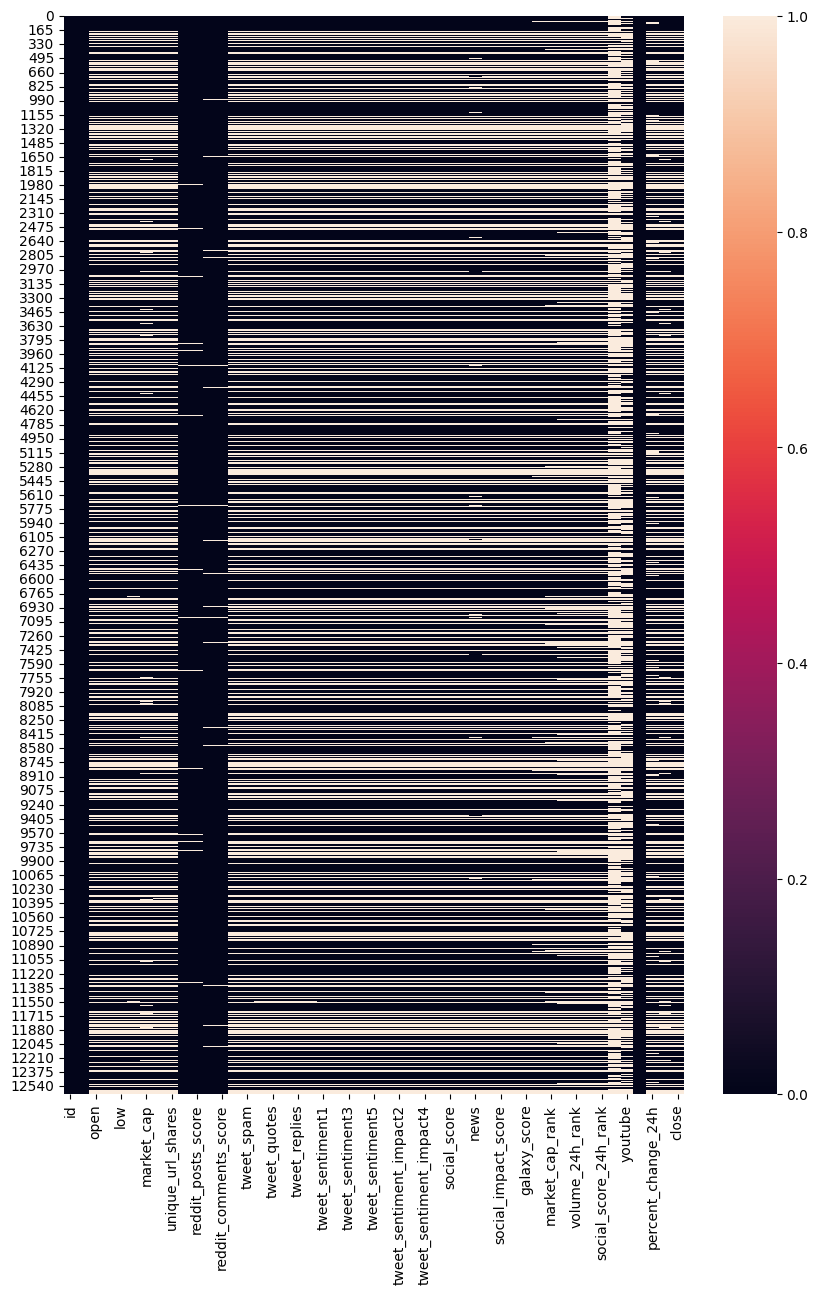

In [13]:
plt.figure(figsize = (10,14))
sns.heatmap(df.isna())

In [14]:
df2 = df[df["close"].notna()]
df2

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216
6,ID_325m2L,1,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,1079.0,661.0,66.0,138.0,53.0,345.0,3890.0,401.0,30469074.0,98.0,1398.0,678.0,4066.0,102.0,181.0,861.0,2490.0,256.0,281173.0,1208072.0,2631596.0,25743321.0,611152.0,30476752.0,3.7,43.0,3.5,3.0,3.1,66.5,0.008594,1.0,656.0,2.0,1.0,1.0,NaN,NaN,4713,1.159070,2.807819e+11,9712.247413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,ID_zwg5VZ,1,19215.293853,19219.559735,19214.640359,8.844918e+08,3.563280e+11,1302.0,841.0,61.0,513.0,101.0,421.0,4792.0,1868.0,23961117.0,100.0,935.0,365.0,4690.0,115.0,439.0,579.0,3462.0,197.0,1920165.0,3655243.0,3190489.0,14779550.0,421760.0,23969443.0,3.7,36.0,2.6,4.3,2.5,65.5,0.006747,1.0,787.0,2.0,1.0,1.0,1.0,2.0,5831,0.266681,5.690401e+11,19219.559735
12628,ID_zydeys,1,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,217.0,39.0,156.0,1501.0,241.0,10909376.0,9.0,170.0,44.0,292.0,35.0,51.0,358.0,973.0,84.0,163376.0,304833.0,775658.0,9213680.0,452344.0,10910586.0,3.7,2.0,3.3,3.0,2.6,63.0,0.019912,1.0,1007.0,2.0,1.0,1.0,NaN,NaN,2020,NaN,1.978198e+11,7303.640282
12629,ID_zyfj4W,1,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,249.0,60.0,107.0,4852.0,513.0,14878543.0,92.0,1127.0,454.0,3252.0,144.0,203.0,952.0,3101.0,452.0,617875.0,656816.0,2617007.0,10307241.0,684529.0,14885477.0,3.7,44.0,2.8,3.0,3.9,67.0,0.020715,1.0,918.0,2.0,1.0,1.0,1.0,2.0,5787,NaN,2.493421e+11,8828.440234
12630,ID_zz5eGB,1,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,81.0,43.0,122.0,3915.0,675.0,14439095.0,153.0,871.0,274.0,3343.0,74.0,188.0,671.0,2691.0,291.0,278732.0,360131.0,1733775.0,10881941.0,1189157

<Axes: >

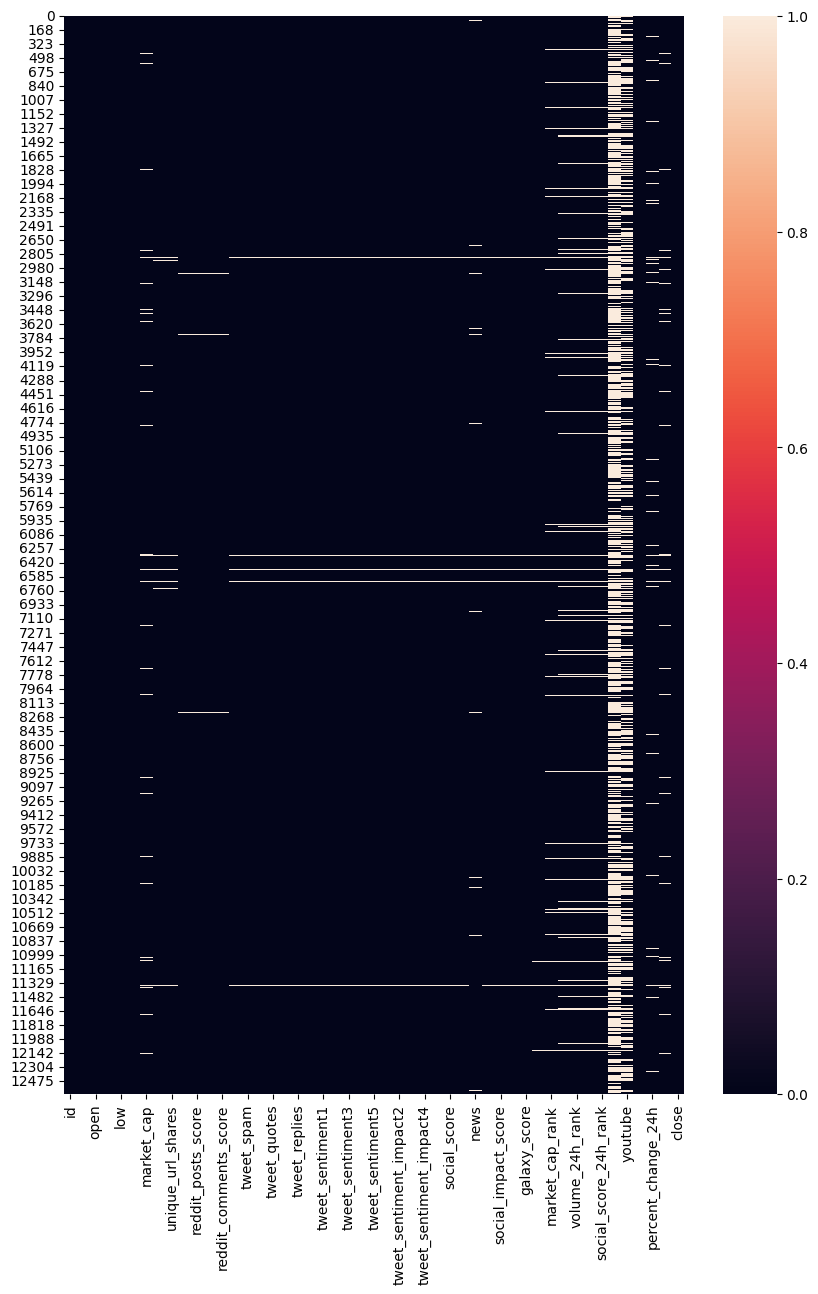

In [15]:
plt.figure(figsize = (10,14))
sns.heatmap(df2.isna())

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8617 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8617 non-null   object 
 1   asset_id                 8617 non-null   int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             8596 non-null   float64
 10  reddit_posts_score       8596 non-null   float64
 11  reddit_comments          8597 non-null   float64
 12  reddit_comments_score    8597 non-null   float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam               858

In [17]:
df2.to_csv("df_no_missing_in_close.csv", index = False)